In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
from pandas_datapackage_reader import read_datapackage
from shortcountrynames import to_name

In [3]:
emissions = read_datapackage("https://github.com/openclimatedata/global-carbon-budget", "territorial-emissions-gcb")

In [4]:
emissions.head()

Emissions Source
Code Year                  
ABW  1959      0.196  CDIAC
     1960      0.169  CDIAC
     1961      0.176  CDIAC
     1962      0.193  CDIAC
     1963      0.185  CDIAC

In [5]:
emissions = emissions.drop("Source", axis=1)

In [6]:
unit = "MtC"

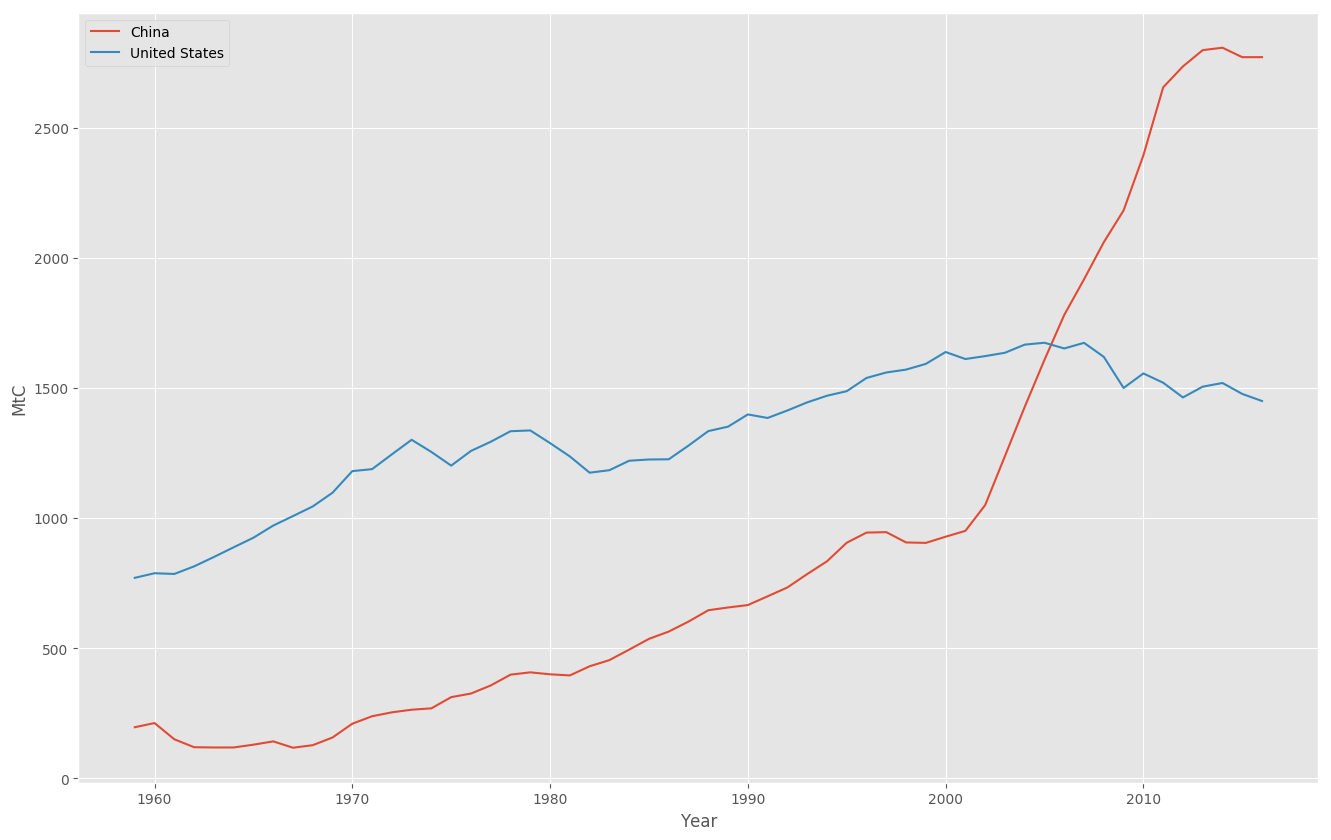

In [7]:
ax = emissions.loc["CHN"].plot()
emissions.loc["USA"].plot(ax=ax)
plt.legend([to_name("CHN"), to_name("USA")])
plt.ylabel(unit);

In [8]:
consumption = read_datapackage("https://github.com/openclimatedata/global-carbon-budget", "consumption-emissions")

In [9]:
consumption.head()

Consumption-Emissions
Code Year                       
ALB  1990                  1.549
     1991                  1.257
     1992                  0.786
     1993                  0.731
     1994                  0.636

In [10]:
unit_consumption = "MtC"


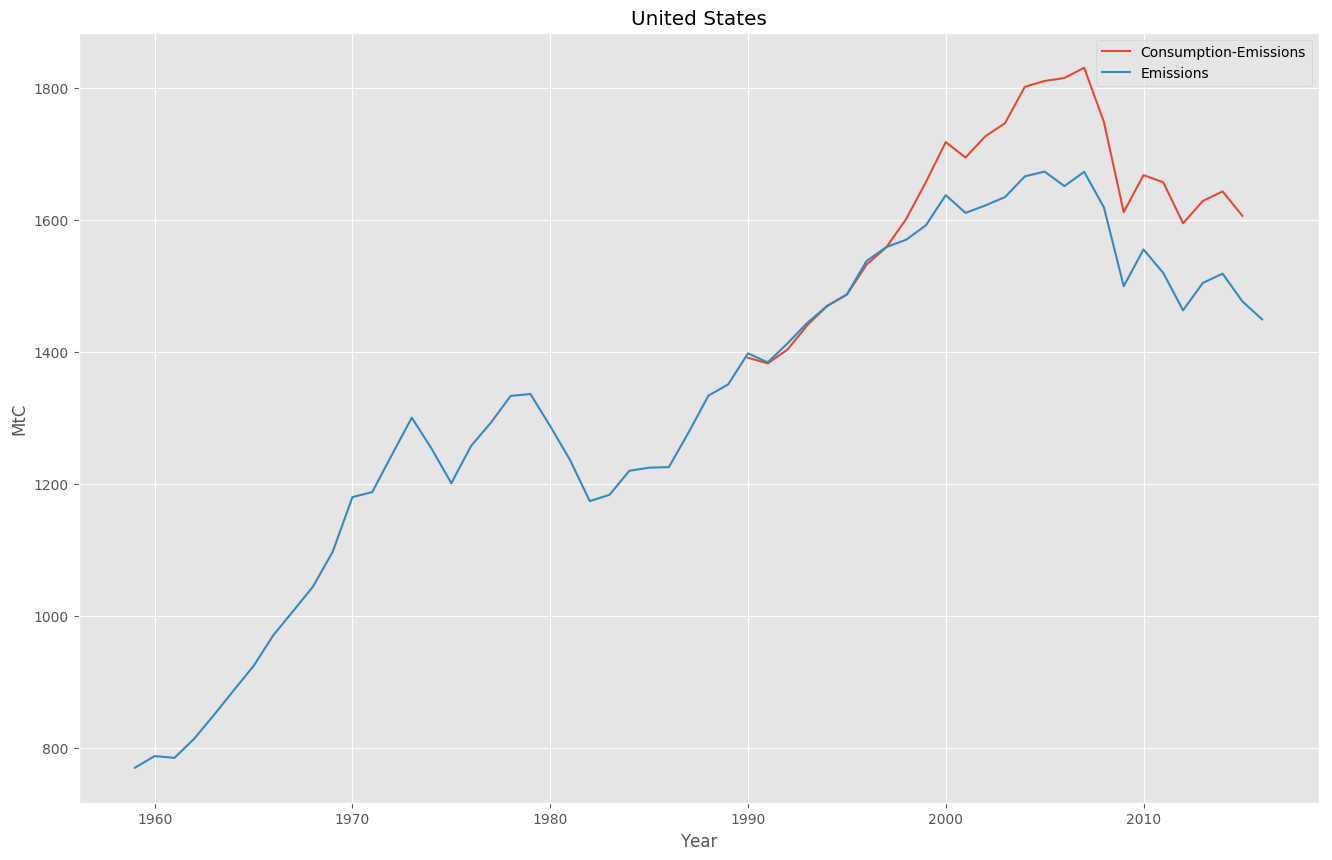

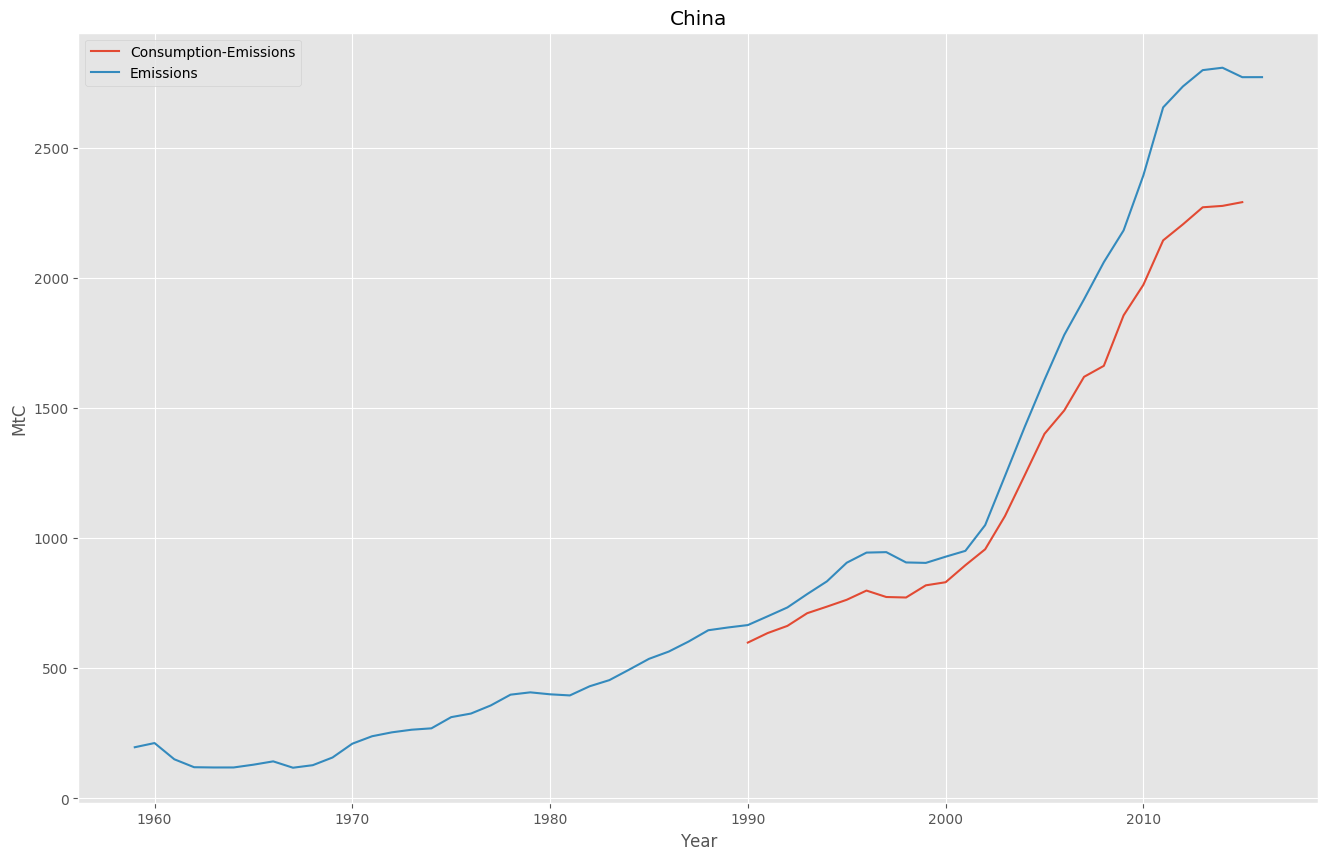

In [11]:
parties = ["USA", "CHN"]
for code in parties:
    ax = consumption.loc[code].plot()
    emissions.loc[code].plot(ax=ax)
    assert unit == unit_consumption
    plt.title(to_name(code))
    plt.ylabel(unit)